In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import pickle

In [2]:
books = pd.read_csv(r'C:\Users\srihi\Downloads\Mini\book recommend\Books.csv')
users = pd.read_csv(r'C:\Users\srihi\Downloads\Mini\book recommend\Users.csv')
ratings = pd.read_csv(r'C:\Users\srihi\Downloads\Mini\book recommend\Ratings.csv')

C:\Users\srihi\AppData\Local\Temp\ipykernel_20900\500768643.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r'C:\Users\srihi\Downloads\Mini\book recommend\Books.csv')


In [3]:
books.columns=['ISBN','bookTitle','bookAuthor','yearOfPublication',
              'publisher','imageUrlS','imageUrlM','imageUrlL']
users.columns=['userID','Location','Age']
ratings.columns=['userID','ISBN','bookRating']

In [4]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


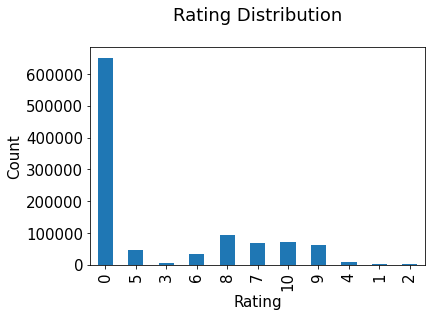

In [7]:
plt.rc("font",size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png',bbox_inches='tight')
plt.show()

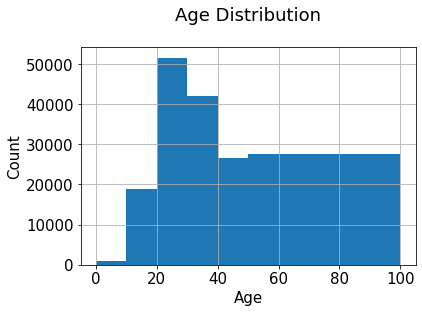

In [8]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png',bbox_inches='tight')
plt.show()

In [9]:
counts1=ratings['userID'].value_counts()
ratings=ratings[ratings['userID'].isin(counts1[counts1>=200].index)]
counts=ratings['bookRating'].value_counts()
ratings=ratings[ratings['bookRating'].isin(counts[counts>=100].index)]

In [10]:
combine_book_rating=pd.merge(ratings,books,on='ISBN')
columns=['yearOfPublication','publisher','bookAuthor','imageUrlS','imageUrlM','imageUrlL']
combine_book_rating=combine_book_rating.drop(columns,axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [11]:
combine_book_rating=combine_book_rating.dropna(axis=0,subset=['bookTitle'])
book_ratingCount=(combine_book_rating.groupby(by=['bookTitle'])['bookRating'].count().reset_index().
                 rename(columns={'bookRating':'totalRatingCount'})
                 [['bookTitle','totalRatingCount']])
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [12]:
rating_with_totalRatingCount=combine_book_rating.merge(book_ratingCount,left_on='bookTitle',
                                                      right_on='bookTitle',how='left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,74
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,74
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,74
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,74
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,74


In [13]:
popularity_threshold=50
rating_popular_book=rating_with_totalRatingCount.query('totalRatingCount>=@popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,74
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,74
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,74
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,74
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,74


In [14]:
combined=rating_popular_book.merge(users,left_on='userID',right_on='userID',how='left')
us_canada_user_rating=combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age',axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,74,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,74,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,74,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,74,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,74,"mechanicsville, maryland, usa"


In [15]:
us_canada_user_rating=us_canada_user_rating.drop_duplicates(['userID','bookTitle'])
us_canada_user_rating_pivot=us_canada_user_rating.pivot(index='bookTitle',columns='userID',values='bookRating').fillna(0)
us_canada_user_rating_matrix=csr_matrix(us_canada_user_rating_pivot.values)
us_canada_user_rating_pivot

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(us_canada_user_rating_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [17]:
query_index=np.random.choice(us_canada_user_rating_pivot.shape[0])
distances,indices=model_knn.kneighbors(
    us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
print(query_index)

183


In [18]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}:{1},with distance of {2}:'.format(
            i,us_canada_user_rating_pivot.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendations for Full Tilt (Janet Evanovich's Full Series):

1:Full House (Janet Evanovich's Full Series),with distance of 0.5842335938741225:
2:The Next Accident,with distance of 0.641911289919234:
3:Beach House,with distance of 0.6454549944400231:
4:Faking It,with distance of 0.6849183674984961:
5:To the Nines: A Stephanie Plum Novel,with distance of 0.7094614748273733:


In [19]:
import pickle
pickle.dump(model_knn,open('book.pkl','wb'))
us_canada_user_rating_pivot.to_csv('us_canada_user_rating_pivot1.csv')